In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import folium
import requests
import random
from folium.map import *
from folium import plugins
from folium.plugins import MeasureControl
from folium.plugins import FloatImage

print(pd.__version__)
# data = pd.read_csv("gun-violence-data_01-2013_03-2018.csv")
# data.head()

AttributeError: module 'pandas' has no attribute '__version__'

In [101]:
from folium.plugins import FastMarkerCluster
map_osm = folium.Map(location=[48, -102], zoom_start=4)
counter = 0
ct= 0 
sam = data.sample(3500)
FastMarkerCluster(data = list(zip(sam['latitude'].values, sam['longitude'].values))).add_to(map_osm)
# non_violent_loc =[[ 37.783003799999996,-122.4124143],[37.77436883,-122.5058834],[37.74491907,-122.47577350000002],[37.71083265,-122.43244650000001]]
for index,loc in sam.iterrows():

        if(pd.notnull(loc[14]) and pd.notnull(loc[16])):
            latlong = [loc[14], loc[16]]
        folium.CircleMarker(location=latlong, radius=8, fill_opacity=.5, fill=True).add_to(map_osm)
folium.LayerControl().add_to(map_osm)
    
map_osm

ValueError: Location values cannot contain NaNs.

In the following piece of code, we have just worked on tidying and scraping the data required which in this case is 
splitting month into 3 different columns of month year and day so that we can access it more easily. We have further used 
it to acquire the frequency of gun violence crimes over the different years so that we can get an idea about 
whether we have had a yearlly incline or decline.

In [90]:
import collections
year = []
month = []
day = []
q = []
count = 0
uniqueyear = {}
for index,loc in sam.iterrows():
    year.append(int(loc[1].split('-')[0]))
    month.append(int(loc[1].split('-')[1]))
    day.append(int(loc[1].split('-')[2]))
sam['Year'] = year
sam['Month'] = month
sam['Day'] = day

for i in year:
    if i not in q:
        q.append(i)
        uniqueyear[i] = 0
        
for i in year:
    uniqueyear[i] += 1
    

display(uniqueyear)
        
        


{2017: 860, 2016: 854, 2014: 818, 2015: 787, 2018: 176, 2013: 5}

In the following plot graph, we have made an effort to plot the respective number of gun violence cases
against their respective years, I have done this by initially creating a dictionary that maps each year to
the total number of gun violence cases that have happened in that respective year. Eventually i have mapped 
every key and and its values to different lists. Furthermore, I have then created a pandas dataframe that just has two columns-Year and frequency. Using the dataframe, I have plotted the columns on the X and Y axis using Matplotlib to give us a good idea of how variable gun violence has been over the years between 2013 and 2018.

OrderedDict([(2013, 5),
             (2014, 818),
             (2015, 787),
             (2016, 854),
             (2017, 860),
             (2018, 176)])

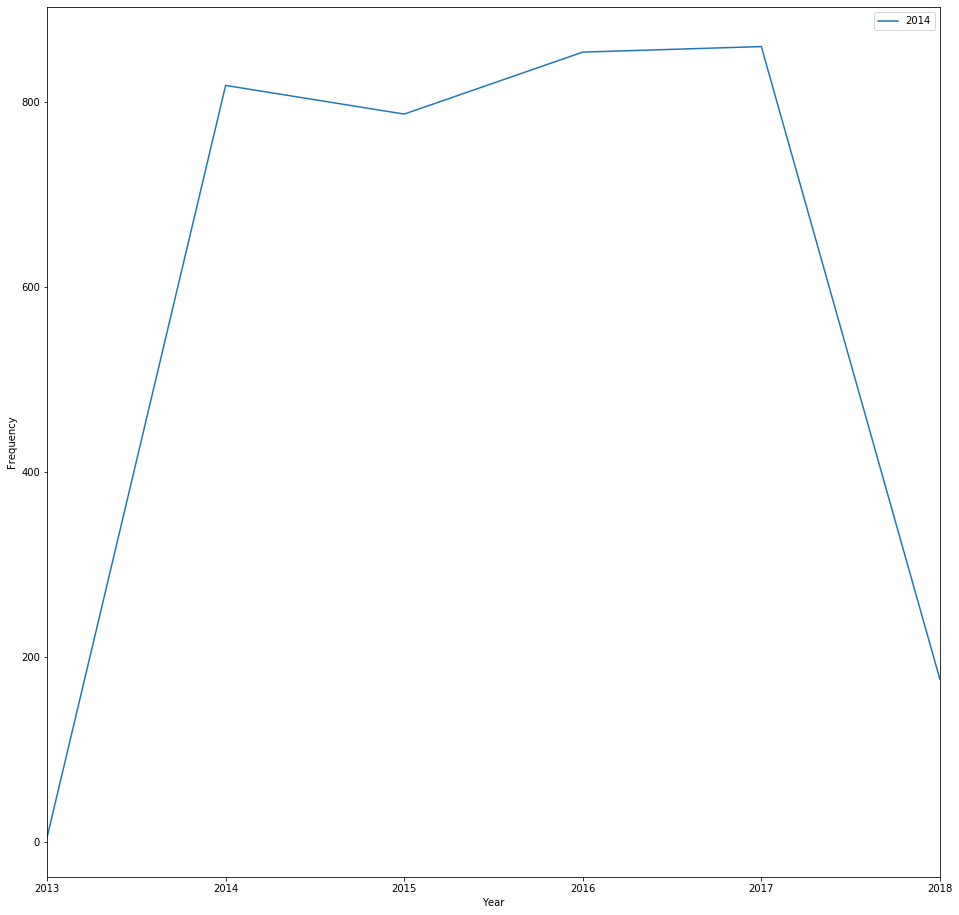

In [105]:
fig, ax = plt.subplots(figsize=(16,16))
uniqueyear = collections.OrderedDict(sorted(uniqueyear.items()))
display(uniqueyear)
f = []
y = []
for i in uniqueyear:
    f.append(uniqueyear[i])
    y.append(i)
p = pd.DataFrame({'Year' : y , 'frequency' : f})


p.plot(x = 'Year', y = 'frequency', ax = ax, label = teamName)
plt.ylabel('Frequency')
ax.set_xlim([2013,2018])
plt.show()